# Adult Census Income Data Analysis
By Brandon Cabrera


This analysis is based on the Adult Census Income Data 
https://www.kaggle.com/datasets/uciml/adult-census-income/data


# Adult Census Income Data Columns
The Adult Census Income data has 15 columns:
1. age: Age of the individual
2. workclass: Type of employment
3. fnlwgt: Indicates how many people the observation represents from the U.S. population
4. education: Highest level of education the indvidual completed
5. education.num: Numerical representation of education level
6. marital.status: Marital status of the individual
7. occupation: Occupation the individual holds
8. relationship: Relationship within the household
9. race: Race of the individual
10. sex: Biological sex
11. capital.gain: money earned from investments
12. capital.loss: money lost from investments
13. hours.per.week: Average number of hours worked per week
14. native.country: Country of origin
15. income: Indicates whether individual's income is > 50k or <= 50k


# Analysis Questions
Now that we know the columns found in the dataset we can come up with a few questions that as we explore our dataset we can hopefully answer.
1. What was the average number of hours worked for a person who
made over 50k, and what was the average number of hours worked
for a person who made less than or equal to 50k?
2. For a person whose highest education level is only high school, who
makes over 50k, if any, what is the average number of hours worked?
3. What is the average education level for a person making over 50k,
and what is the average education level for a person making <= 50k?
4. What is the correlation between capital gain and whether or not a
person makes over 50k?
5. What marital status has the most people making over 50k, and what
marital status has the most people making less than or equal to 50k?
6. What numerical column has the highest amount of correlation, in
terms of magnitude, with where a person made over 50k or less than
or equal to 50k?
7. What workclass has the most people making <= 50k, and what work
class has the most people making >50k?
8. Do women or men tend to make > 50k more than the other, and do
women or men tend to make <= 50k
9. What is the average age of men who make over 50k, and what is the
average age of women who make over 50k
10. Which race tends to make > 50k, more than the other races, and
what race tends to make <= 50k more than the other races


# Importing Required Libraries

Before we start loading the data we need to import important libraries

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Importing Dataset
All of our data is contained within one dataset so let's load it and save it as a DataFrame

In [262]:
adult_census_data = pd.read_csv('data/adult_census_income.csv') #load the csv file into DataFrame
adult_census_data.head() # Display the first 5 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's get some info about the columns of the dataset including how many non-null values they have and what each respective column's data type is.

In [263]:
adult_census_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Cleaning and preparing dataset

Before we start exploring the dataset more in detail we want to make sure our dataset is clean so let's check to see if there is any null values.

In [264]:
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


It appears there isn't an null values at first glace. However the dataset does contain '?' in some columns , e.g. row 0 of the workclass column contains a '?'. A question mark is a bit ambigious so for the sake of less ambiguity we will replace the question marks for NaN. So now our data set does have null values which we can decided later on how to deal with them. 

In [283]:
adult_census_data.replace('?', np.nan, inplace=True)
adult_census_data.head(10) # display first 10 rows

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,binary_income_over_$50k,binary_income_equal_under_$50k
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,1
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,1
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,1
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,1
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,1
7,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,1,0
8,68,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,0,1
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K,1,0
11,38,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K,1,0
12,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K,1,0


In [284]:
adult_census_data.tail(10) # display the last 10 rows

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,binary_income_over_$50k,binary_income_equal_under_$50k
32551,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K,0,1
32552,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,0,1
32553,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,0,1
32554,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0,1
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1,0
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,0
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32560,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


Let's see how many null values we have now after replacing the '?' values.

In [266]:
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Notice that the missing values are only for qualtative features and that all of the numeric features don't have any missing values. This helps us to understand why originally there was '?' values for these columns instead of NaN because it's a qualtative column, NaN isn't the most appropiate placeholder. For a better understanding of how many null values we have let's look at the percentage of null values there is.

In [267]:
print(((adult_census_data.isnull().sum() / len(adult_census_data)) * 100).round(2)) # divide null values by total number of values in column and round to two decimals

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


The highest percentages is seen 'occupation' feature meaning 5.66 % of the values in the feature are null values. The percentage isn't that high so we can get rid of the rows with null values without worrying about losing too much data.

In [268]:
adult_census_data.dropna(inplace = True)
print(adult_census_data.count())

age               30162
workclass         30162
fnlwgt            30162
education         30162
education.num     30162
marital.status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital.gain      30162
capital.loss      30162
hours.per.week    30162
native.country    30162
income            30162
dtype: int64


The null values in the dataset have been removed. I now want add two binary columns using the 'income' column. One column will represent if the the individual makes over $50k and the other column will represent if the individiual makes less than or equal to $50k.

In [269]:
def add_income_binary_columns(df:pd.DataFrame) -> pd.DataFrame:
  """Adds two binary columns based on the income column to DataFrame passed as argument. One column represents if the indiviual makes
  > $50k and the other column represents whether the individual makes <= 50k.

  Args:
      df (DataFrame): DataFrame to add columns to

  Returns:
      DataFrame: Returns a DataFrame with the orignal columns and two new binary columns
  """

  df['binary_income_over_$50k']  = (adult_census_data['income'] == '>50K').astype(int) # 1 for over 50k and 0 for <= 50k
  df['binary_income_equal_under_$50k'] = (adult_census_data['income'] == '<=50K').astype(int) # 1 for <= 50k and 0 for > 50k
  return df

Let's confirm that the two new columns were added.

In [270]:
adult_census_data = add_income_binary_columns(adult_census_data)
adult_census_data[['binary_income_over_$50k', 'binary_income_equal_under_$50k']].head(10) # display first 10 rows

,binary_income_over_$50k,binary_income_equal_under_$50k
1,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,0,1
10,1,0
11,1,0
12,1,0


We are going to drop 'fnlwgt' column since it doesn't provide us any useful information to help answer our questions

In [271]:
adult_census_data.drop('fnlwgt', inplace = True, axis = 1)

In [272]:
adult_census_data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,binary_income_over_$50k,binary_income_equal_under_$50k
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,1
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,1
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,1
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0,1
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0,1


# Exploratory Data Analysis(EDA)

We can split up out exploration of the dataset into two categories: numerical columns and qualtative columns. Our goal here is to get some graphs that help answer our analysis questions.

### Exploring numerical columns 
We're going to do some boxplots for our numerical columns as the y-values for our boxplots and then for our x-values we'll do one of the binary income columns. It doesn't matter whether we choose 'binary_income_under_$50k' or 'binary_income_over_$50k' since we'll still get the same information, the graphs would just be mirrored versions of each other.

In [273]:
def plot_boxplot(x:str, y:str) -> pd.DataFrame: 
  """Plots a boxplot and returns a DataFrame containing descriptive stats shown by the boxplot

  Args:
      x (String): A column name from adult_census_data
      y (String)): A column name from adult_census_data

  Returns:
      DataFrame: Contains descriptive stats of what's shown on the boxplot
  """
  fig = plt.figure(figsize=(12,12))
  fig = sns.boxplot(data = adult_census_data, x = adult_census_data[x], y = adult_census_data[y], hue = adult_census_data['income'],)
  plt.show()
  group_0 = adult_census_data[adult_census_data['binary_income_over_$50k'] == 0][y]
  group_1 = adult_census_data[adult_census_data['binary_income_over_$50k'] == 1][y]
  group_combined = pd.DataFrame({'Income <= 50k(0)' : group_0.describe(), 'Income > 50k(1)': group_1.describe()})
  return group_combined

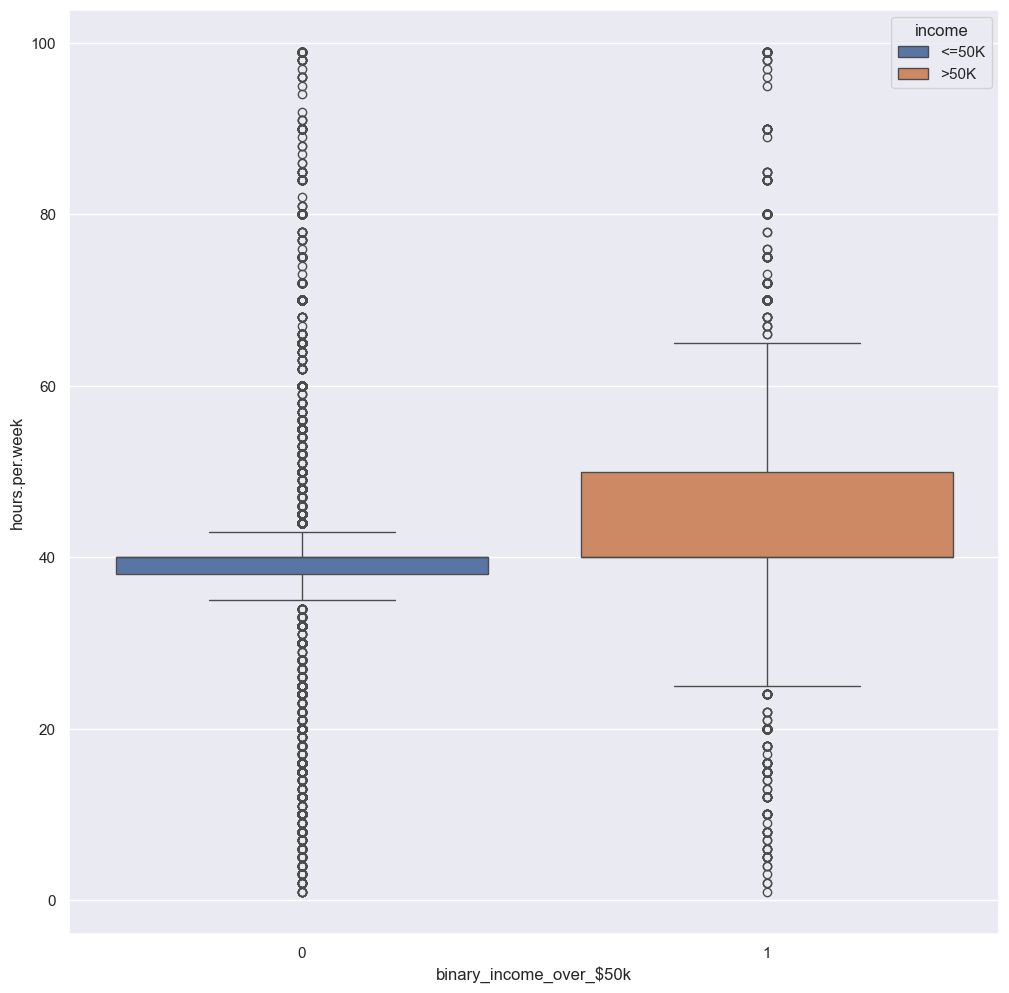

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,39.348592,45.706580
std,11.950774,10.736987
min,1.000000,1.000000
25%,38.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


In [274]:
hours_per_week_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'hours.per.week')
hours_per_week_info

From the above boxplot we can tell that people who made over 50k had a higher average number of hours worked per week with 45.7 hours worked. Their standard deviation are similar with a differnce of around 1.22 hours worked. The quartiles for two groups are close in value aswell. This answers analysis question #1, what was the mean average amount of hours worked for each group.

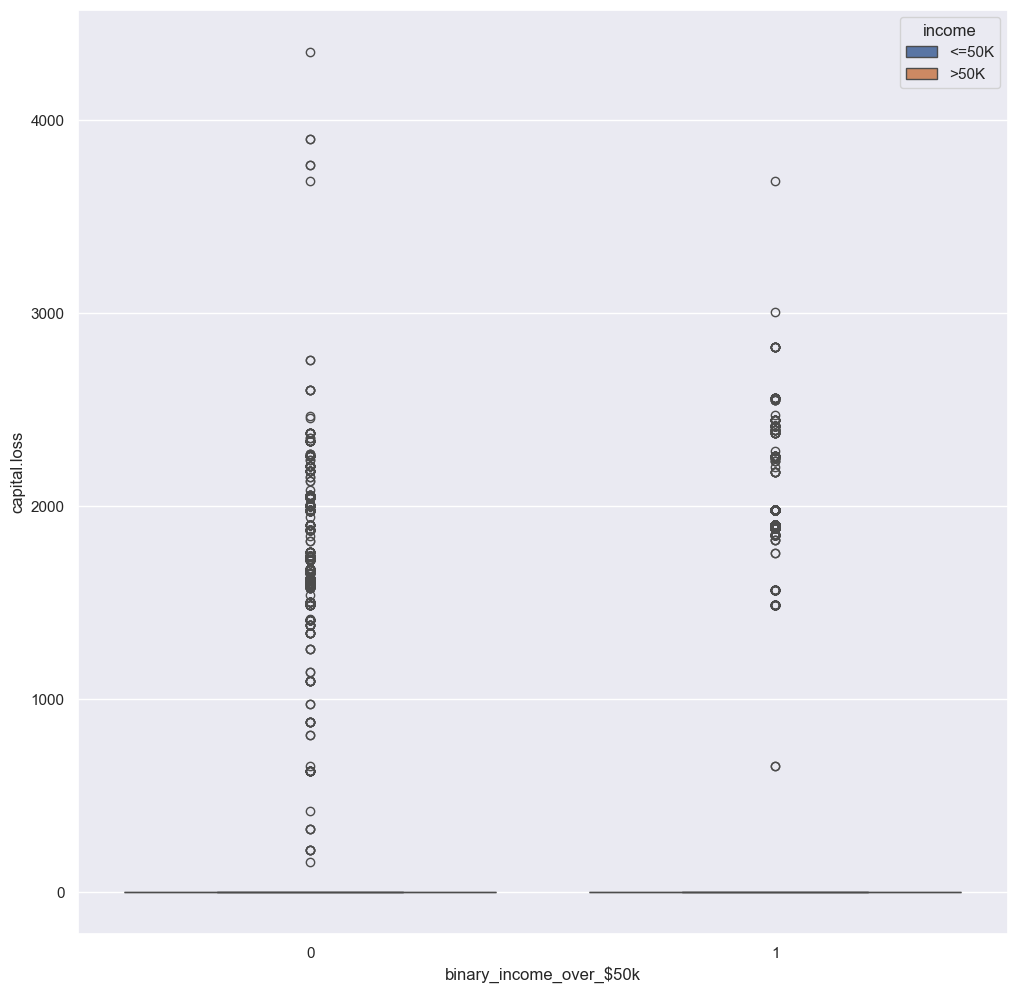

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,53.448000,193.750666
std,310.270263,592.825590
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


In [275]:
capital_loss_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'capital.loss')
capital_loss_info

The quartiles of the boxplot are hard to see since it's been squished to the bottom of the graph. From the descriptive stats, people who make over $50k have a mean of $193.75 capital loss, so they actually lose more from investments than people who make under $50k with a mean of $53.44 capital loss. The max value for people who make <= $50k actually is higher than those who do make > $50k with values of $4356.0 and $3683.0, respectively.

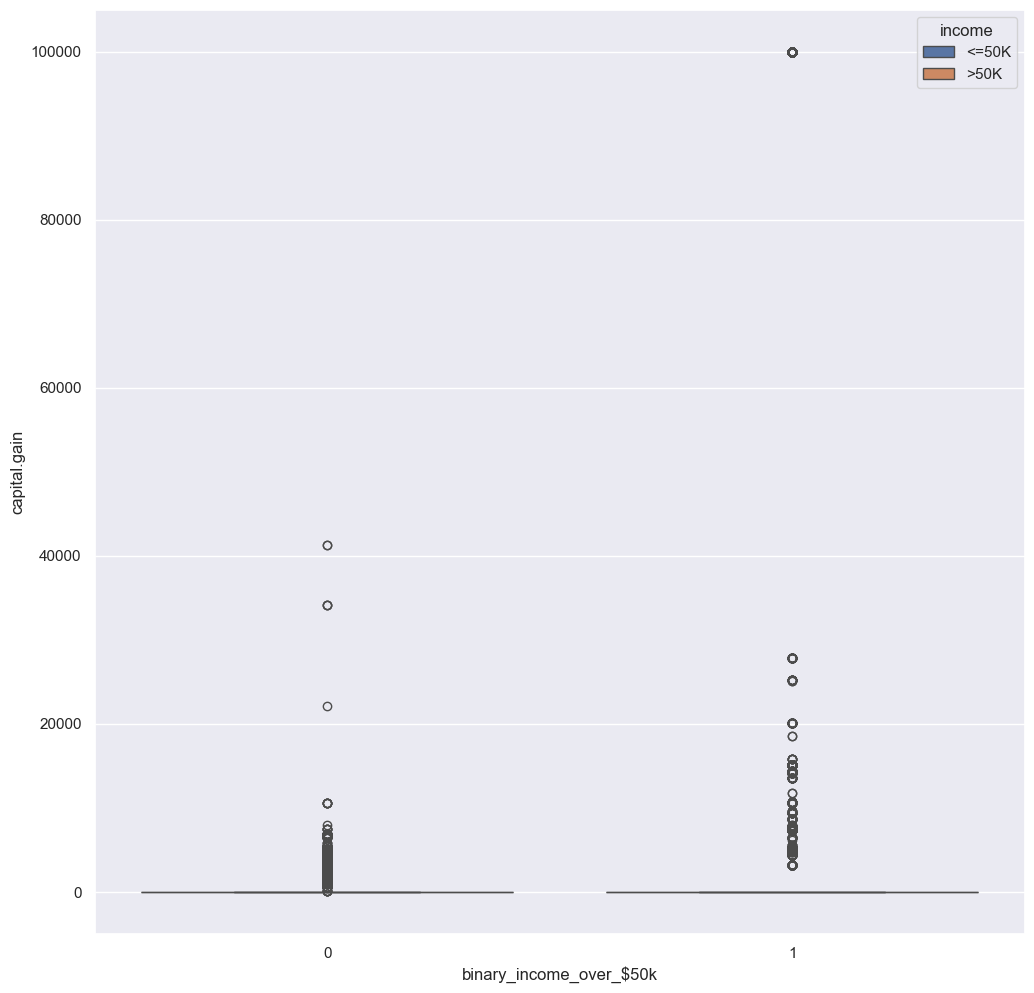

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,148.893838,3937.679808
std,936.392280,14386.060019
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


In [276]:
capital_gain_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'capital.gain')
capital_gain_info

Once again the quartiles for the boxplot have been squished to the bottom of the graph. The descriptive stats tell us that for the people who make > $50k they have a mean of $3937.67 capital gain while the people who make <= $50k have a mean of $148.89 capital gain. That is a sizeable difference between the two. The max value of capital gain is $41310.0 for people who make < 50k and then for people who make >50k it's $99999.00

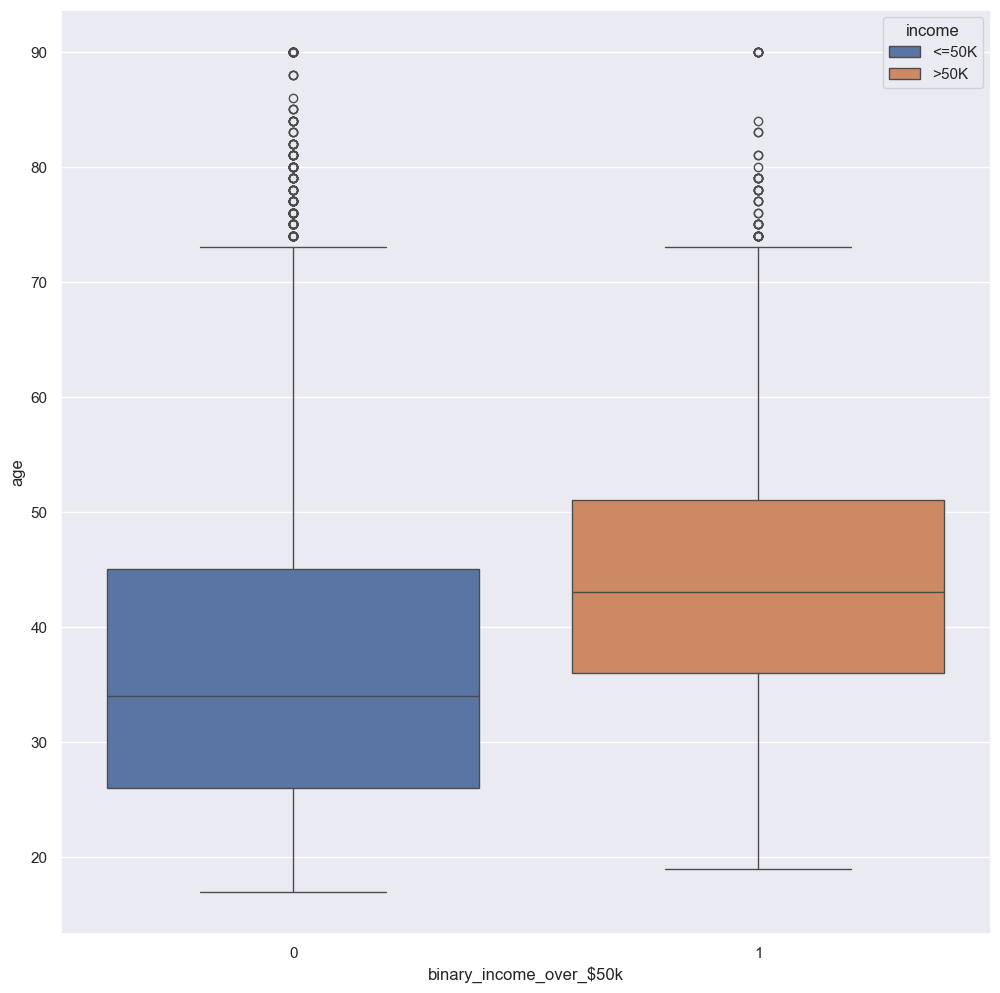

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,36.608060,43.959110
std,13.464631,10.269633
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,45.000000,51.000000
max,90.000000,90.000000


In [277]:
age_group_info = plot_boxplot(x = 'binary_income_over_$50k', y='age')
age_group_info


From the above figure and the statistics, the mean age of people who make > $50k is higher than the mean age of people who make <= $50k. With values of 43.95 years old and 36.60 years old respectively.

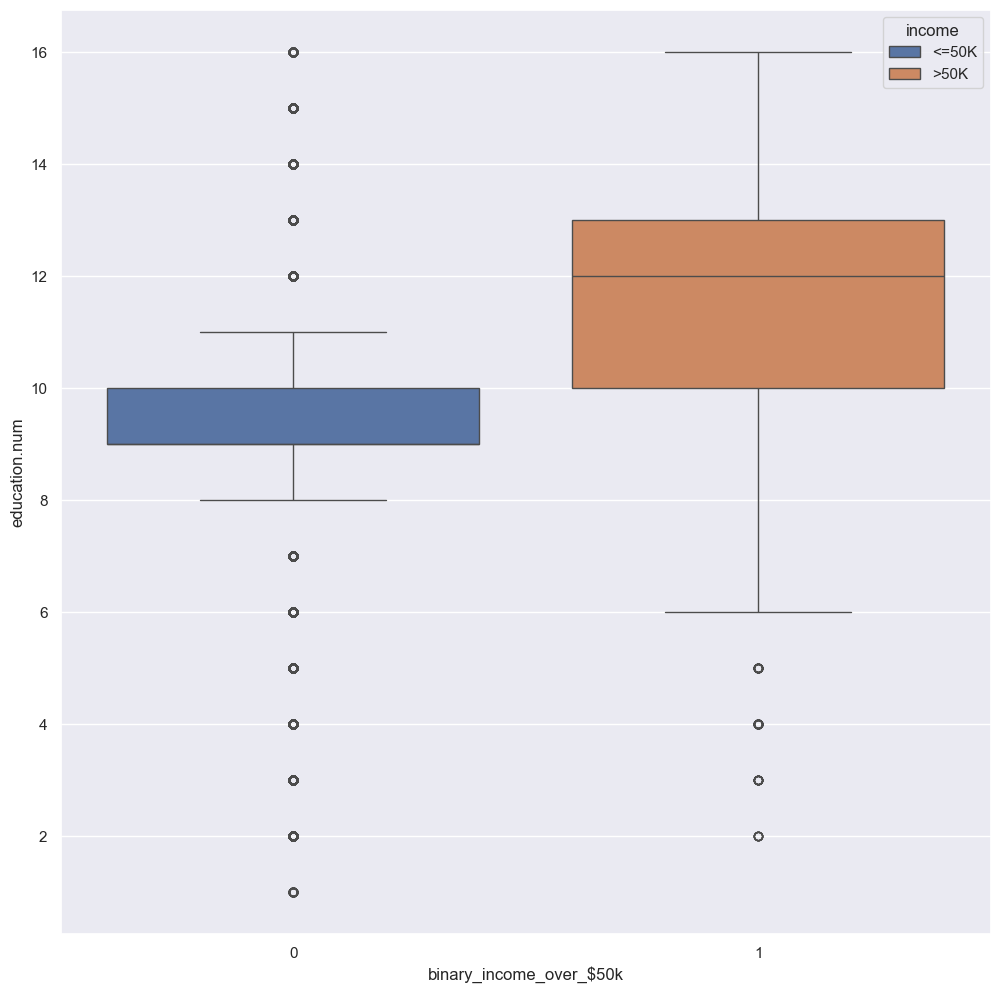

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,9.629116,11.606420
std,2.413596,2.368423
min,1.000000,2.000000
25%,9.000000,10.000000
50%,9.000000,12.000000
75%,10.000000,13.000000
max,16.000000,16.000000


In [278]:
education_num_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'education.num')
education_num_info

The above information tells us that the average education number for people who make > $50k is 12 if we round up to the nearest number, which is equivalent to Assoc-acdm in terms of education level. Then for the people who make <= 50k, rounding up to the nearest whole number, the average education number is 10, meaning they have some-college.

### Hypothesis Testing For Numerical Columns

We were able to answer our analysis question that involved our numerical columns, however it's worthwhile to see if some of them are statistically significant. 

### Exploring qualtative columns

In [279]:
adult_census_data.describe() # get statistics for each numeric column


,age,education.num,capital.gain,capital.loss,hours.per.week,binary_income_over_$50k,binary_income_equal_under_$50k
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.248922,0.751078
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


# Testing Hypothesis